In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
fees0 = pd.read_csv("../project_dataset/fees_data.csv")
cash0 = pd.read_csv('../project_dataset/cash_request.csv')
merged0 = pd.read_csv("./merged_df.csv")

In [75]:
fees = fees0.copy()
cash = cash0.copy()
merged = merged0.copy()

In [77]:
#Convertir fechas a typo date 
merged['created_at'] = pd.to_datetime(merged['created_at'])
merged['updated_at'] = pd.to_datetime(merged['updated_at'])
merged['moderated_at'] = pd.to_datetime(merged['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['reimbursement_date']=pd.to_datetime(merged['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['reco_last_update']=pd.to_datetime(merged['reco_last_update'])
merged['reco_creation'] = pd.to_datetime(merged['reco_creation'])
merged['cash_request_received_date'] = pd.to_datetime(merged['cash_request_received_date'])
merged['money_back_date'] = pd.to_datetime(merged['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['send_at'] = pd.to_datetime(merged['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [50]:
cash['created_day_of_week'] = cash['created_at'].dt.day_name()
day_of_week_counts = cash.groupby(['created_day_of_week']).size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

In [78]:
#Defining  cohortes of the cashrequests which were charrgeed with fees
merged['Cohorte'] = merged.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_2330/822340341.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged['Cohorte'] = merged.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [80]:
cohort_amount = merged.groupby('Cohorte')['amount'].sum().reset_index()
cohort_amount

,Cohorte,amount
0,2020-04,500.0
1,2020-05,48771.0
2,2020-06,278128.0
3,2020-07,252325.0
4,2020-08,328168.0
5,2020-09,293758.0
6,2020-10,441131.0
7,2020-11,5510.0


In [55]:
#Creating a subset of fees of the users that choseed instant type of the transfer
incident_subset = fees[fees['type'].str.contains('incident', case=False)]
incident_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 1 to 21051
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2196 non-null   int64  
 1   cash_request_id  2196 non-null   float64
 2   type             2196 non-null   object 
 3   status           2196 non-null   object 
 4   category         2196 non-null   object 
 5   total_amount     2196 non-null   float64
 6   reason           2196 non-null   object 
 7   created_at       2196 non-null   object 
 8   updated_at       2196 non-null   object 
 9   paid_at          1754 non-null   object 
 10  from_date        0 non-null      object 
 11  to_date          0 non-null      object 
 12  charge_moment    2196 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 240.2+ KB


In [56]:
for column in incident_subset.columns:
    print("Value counts for column", column, ":")
    print(incident_subset[column].value_counts())
    print()

Value counts for column id :
id
6961     1
12720    1
12716    1
12718    1
12704    1
        ..
6298     1
3486     1
7539     1
7668     1
20897    1
Name: count, Length: 2196, dtype: int64

Value counts for column cash_request_id :
cash_request_id
2739.0     5
3625.0     5
3404.0     4
4920.0     4
5462.0     4
          ..
2924.0     1
4321.0     1
3002.0     1
3175.0     1
17900.0    1
Name: count, Length: 1599, dtype: int64

Value counts for column type :
type
incident    2196
Name: count, dtype: int64

Value counts for column status :
status
accepted     1560
rejected      520
cancelled      97
confirmed      19
Name: count, dtype: int64

Value counts for column category :
category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64

Value counts for column total_amount :
total_amount
5.0    2196
Name: count, dtype: int64

Value counts for column reason :
reason
rejected direct debit               1599
month delay on payment - 9/2020      283

In [57]:
#Creating a subset of fees of the users that choseed instant type of the transfer
instant_subset = fees[fees['reason'].str.contains('instant', case=False)]
instant_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11099 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11099 non-null  int64  
 1   cash_request_id  11095 non-null  float64
 2   type             11099 non-null  object 
 3   status           11099 non-null  object 
 4   category         0 non-null      object 
 5   total_amount     11099 non-null  float64
 6   reason           11099 non-null  object 
 7   created_at       11099 non-null  object 
 8   updated_at       11099 non-null  object 
 9   paid_at          10998 non-null  object 
 10  from_date        0 non-null      object 
 11  to_date          0 non-null      object 
 12  charge_moment    11099 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [58]:
for column in instant_subset.columns:
    print("Value counts for column", column, ":")
    print(instant_subset[column].value_counts())
    print()

Value counts for column id :
id
6537     1
4160     1
9866     1
16632    1
16977    1
        ..
14490    1
14040    1
16499    1
15140    1
13301    1
Name: count, Length: 11099, dtype: int64

Value counts for column cash_request_id :
cash_request_id
25927.0    2
20761.0    2
25880.0    2
22845.0    2
24041.0    2
          ..
25695.0    1
21428.0    1
23212.0    1
26207.0    1
20982.0    1
Name: count, Length: 11082, dtype: int64

Value counts for column type :
type
instant_payment    11099
Name: count, dtype: int64

Value counts for column status :
status
accepted     10296
rejected       673
confirmed       69
cancelled       61
Name: count, dtype: int64

Value counts for column category :
Series([], Name: count, dtype: int64)

Value counts for column total_amount :
total_amount
5.0     11098
10.0        1
Name: count, dtype: int64

Value counts for column reason :
reason
Instant Payment Cash Request 24041    2
Instant Payment Cash Request 20307    2
Instant Payment Cash Request 2

In [59]:
#Creating a subset of fees of the users that choseed instant type of the transfer
month_dlay_subset = fees[fees['reason'].str.contains('month', case=False)]
month_dlay_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 44 to 21046
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               597 non-null    int64  
 1   cash_request_id  597 non-null    float64
 2   type             597 non-null    object 
 3   status           597 non-null    object 
 4   category         597 non-null    object 
 5   total_amount     597 non-null    float64
 6   reason           597 non-null    object 
 7   created_at       597 non-null    object 
 8   updated_at       597 non-null    object 
 9   paid_at          411 non-null    object 
 10  from_date        0 non-null      object 
 11  to_date          0 non-null      object 
 12  charge_moment    597 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 65.3+ KB


In [60]:
for column in month_dlay_subset.columns:
    print("Value counts for column", column, ":")
    print(month_dlay_subset[column].value_counts())
    print()

Value counts for column id :
id
13583    1
9484     1
7823     1
4116     1
2701     1
        ..
4419     1
7168     1
7157     1
7145     1
12566    1
Name: count, Length: 597, dtype: int64

Value counts for column cash_request_id :
cash_request_id
3625.0    4
2739.0    4
3705.0    3
4065.0    3
3710.0    3
         ..
8633.0    1
7341.0    1
7138.0    1
7199.0    1
6114.0    1
Name: count, Length: 358, dtype: int64

Value counts for column type :
type
incident    597
Name: count, dtype: int64

Value counts for column status :
status
accepted     276
rejected     241
cancelled     70
confirmed     10
Name: count, dtype: int64

Value counts for column category :
category
month_delay_on_payment    597
Name: count, dtype: int64

Value counts for column total_amount :
total_amount
5.0    597
Name: count, dtype: int64

Value counts for column reason :
reason
month delay on payment - 9/2020     283
month delay on payment - 8/2020     203
month delay on payment - 10/2020    102
month delay 

In [61]:
#Creating a subset of fees of the users that choseed instant type of the transfer
postpone_subset = fees[fees['reason'].str.contains('postpone', case=False)]
postpone_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7766 entries, 9 to 21013
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7766 non-null   int64  
 1   cash_request_id  7766 non-null   float64
 2   type             7766 non-null   object 
 3   status           7766 non-null   object 
 4   category         0 non-null      object 
 5   total_amount     7766 non-null   float64
 6   reason           7766 non-null   object 
 7   created_at       7766 non-null   object 
 8   updated_at       7766 non-null   object 
 9   paid_at          2779 non-null   object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    7766 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 849.4+ KB


In [62]:
for column in postpone_subset.columns:
    print("Value counts for column", column, ":")
    print(postpone_subset[column].value_counts())
    print()

Value counts for column id :
id
15431    1
18543    1
9414     1
11752    1
10277    1
        ..
20582    1
16367    1
15955    1
17669    1
832      1
Name: count, Length: 7766, dtype: int64

Value counts for column cash_request_id :
cash_request_id
12225.0    34
5006.0     25
4410.0     23
12452.0    20
11376.0    20
           ..
23495.0     1
19828.0     1
22454.0     1
25831.0     1
4112.0      1
Name: count, Length: 4057, dtype: int64

Value counts for column type :
type
postpone    7766
Name: count, dtype: int64

Value counts for column status :
status
cancelled    4780
accepted     2985
rejected        1
Name: count, dtype: int64

Value counts for column category :
Series([], Name: count, dtype: int64)

Value counts for column total_amount :
total_amount
5.0    7766
Name: count, dtype: int64

Value counts for column reason :
reason
Postpone Cash Request 12225    34
Postpone Cash Request 5006     25
Postpone Cash Request 4410     23
Postpone Cash Request 12452    20
Postpone Ca

In [63]:
fees.tail()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after
21060,13301,20982.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 20982,2020-10-14 07:12:43.958192+00,2020-10-14 07:12:43.958219+00,2021-02-12 13:02:46.95022+00,NaN,NaN,after


In [64]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [65]:
fees.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [66]:
unique_cash_requests_fees=fees['cash_request_id'].unique()
num_unique_ids = len(unique_cash_requests_fees)
print("Number of unique cashrequest_ids in fees:", num_unique_ids)


Number of unique cashrequest_ids in fees: 12934


In [67]:
#Cash requests that had incideents 
filtered_cash_I = cash[cash['id'].isin(unique_cash_requests_fees)]
filtered_cash_I.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12933 entries, 48 to 23969
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          12933 non-null  int64              
 1   amount                      12933 non-null  float64            
 2   status                      12933 non-null  object             
 3   created_at                  12933 non-null  datetime64[ns, UTC]
 4   updated_at                  12933 non-null  datetime64[ns, UTC]
 5   user_id                     12496 non-null  float64            
 6   moderated_at                63 non-null     datetime64[ns, UTC]
 7   deleted_account_id          437 non-null    float64            
 8   reimbursement_date          11653 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  11903 non-null  datetime64[ns]     
 10  money_back_date             2733 non-null   datetime64[ns, UTC

In [68]:
#Cash requests WITHOUT incideents 
filtered_cash_SI = cash[~cash['id'].isin(unique_cash_requests_fees)]
filtered_cash_SI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11037 entries, 0 to 23955
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          11037 non-null  int64              
 1   amount                      11037 non-null  float64            
 2   status                      11037 non-null  object             
 3   created_at                  11037 non-null  datetime64[ns, UTC]
 4   updated_at                  11037 non-null  datetime64[ns, UTC]
 5   user_id                     9371 non-null   float64            
 6   moderated_at                60 non-null     datetime64[ns, UTC]
 7   deleted_account_id          1667 non-null   float64            
 8   reimbursement_date          9267 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  4386 non-null   datetime64[ns]     
 10  money_back_date             1770 non-null   datetime64[ns, UTC]

In [69]:
value_counts_SI = filtered_cash_SI['created_day_of_week'].value_counts().sort_index()
value_counts_I = filtered_cash_I['created_day_of_week'].value_counts().sort_index()
value_counts_SI


created_day_of_week
Friday       1736
Monday       1461
Saturday     1206
Sunday        823
Thursday     1894
Tuesday      1972
Wednesday    1945
Name: count, dtype: int64

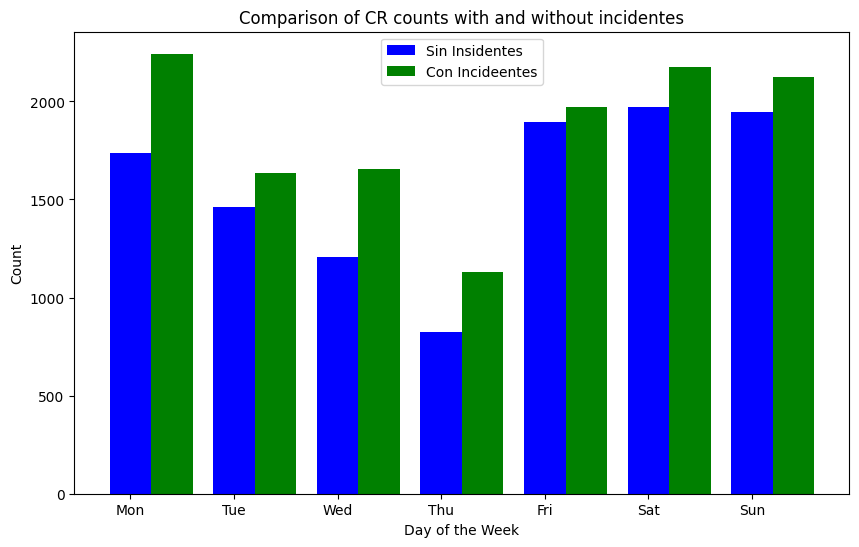

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(value_counts_SI)), value_counts_SI.values, width=0.4, label='Sin Insidentes', color='blue')
plt.bar([i + 0.4 for i in range(len(value_counts_I))], value_counts_I.values, width=0.4, label='Con Incideentes', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Comparison of CR counts with and without incidentes')
plt.xticks(range(len(value_counts_SI)), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()

# Show plot
plt.show()

In [ ]:
#Numeero de  clients unicos es cada cohorte een cada mes
cohort_sizes_monthly = cash.groupby(['Cohorte', 'created_month']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
#La cantidad de clieentes een cada cohortee 

cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()


retencion = cohort_sizes_monthly.pivot(index='Cohorte', columns='created_month', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retencion1 = retencion*100
retencion1